In [40]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
from config import api_key
from citipy import citipy

In [41]:
#generate random coordinates to use for cities list
rand_coordinates = [( np.random.uniform(-90,90 ), np.random.uniform(-180,180) ) for k in range(1400)]

In [42]:
cities = []
for coordinate_pair in rand_coordinates:
    lat, long = coordinate_pair
    cities.append(citipy.nearest_city(lat, long))

In [43]:
cities_list=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    cities_list.append(name)

In [44]:
actual_cities_list=[]
for city in cities_list:
    if city not in actual_cities_list:
        actual_cities_list.append(city)

In [45]:
# Get current weather

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [46]:
# set up lists to hold reponse info
city_name=[]
lat = []
temperature=[]
cloudiness=[]
windspeed=[]
humidity=[]
count=1
for city in actual_cities_list:
    print(f"Processing Record number {count} | {city}")
    print(query_url + str(city))
    count+=1
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Processing Record number 1 | kuragino
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=kuragino
Processing Record number 2 | savannah bight
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=savannah bight
Processing Record number 3 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=amderma
Processing Record number 4 | moindou
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=moindou
Processing Record number 5 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=taolanaro
Processing Record number 6 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=ee414450fc760a81c6891ef8baac6ea5&units=imperial&q=carnarvon
Processing Record number 7 | kaitangata
http://api.openweathermap.org/data/2.5/weather?a

In [47]:
# Loop through the list of cities and perform a request for data on each
for n in actual_cities_list:
    response = requests.get(query_url + str(n)).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temperature.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    humidity.append(response['main']['humidity'])

In [48]:
#create a data frame to store the cities' data
data_df = pd.DataFrame({"City":city_name,
                      "Latitude":lat,
                      "Temperature":temperature,
                      "Cloudiness":cloudiness,
                      "Windspeed":windspeed,
                      "Humidity":humidity,
                      })
data_df.head(10)

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,Kuragino,53.89,52.70,92,2.93,97
1,Savannah Bight,16.45,84.74,0,15.90,92
2,Moindou,-21.69,64.40,90,2.24,88
3,Carnarvon,-30.97,34.70,0,2.59,78
4,Kaitangata,-46.28,45.14,36,18.03,77
5,Rodrigues Alves,-7.74,87.80,40,6.93,48
6,Berlevag,70.86,57.20,0,3.36,76
7,Ushuaia,-54.81,51.80,0,6.93,23
8,Rikitea,-23.12,74.12,88,6.96,100
9,Port Alfred,-33.59,61.88,8,18.03,90


In [51]:
#Saving all the data in a csv file
exported_data = data_df.to_csv('WeatherData.csv')

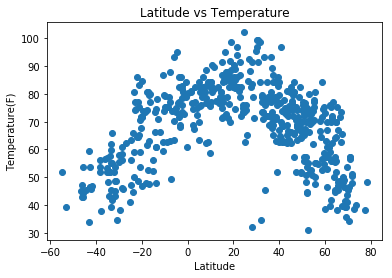

In [50]:

#Latitude vs Temperature scatter plot
x_axis=data_df["Latitude"]
y_axis=data_df["Temperature"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Latitude vs Temperature")
plt.savefig('LatitudevsTemp')
plt.show()

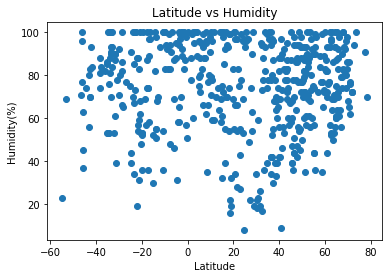

In [52]:
#Latitude vs Humidity plot
x_axis=data_df["Latitude"]
y_axis=data_df["Humidity"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs Humidity")
plt.savefig("LatitudevsHumidity")
plt.show()

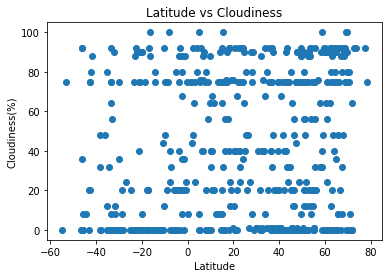

In [53]:
#Latitude vs Cloudiness plot
x_axis=data_df["Latitude"]
y_axis=data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs Cloudiness")
plt.savefig("LatitudevsCloudiness")
plt.show()

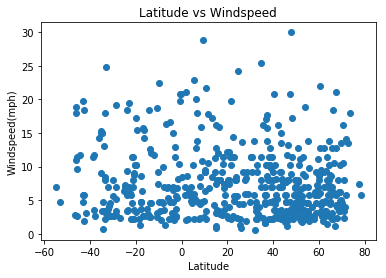

In [54]:
#Latitude vs Wind Speed plot
x_axis=data_df["Latitude"]
y_axis=data_df["Windspeed"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
plt.title("Latitude vs Windspeed")
plt.savefig("LatitudevsWindspeed")
plt.show()